In [1]:
!pip install requests bs4 scikit-learn tweepy kiwipiepy IPython

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
     ---------------------------------------- 0.0/35.5 MB ? eta -:--:--
     -- ------------------------------------- 2.4/35.5 MB 11.2 MB/s eta 0:00:03
     ----- ---------------------------------- 4.7/35.5 MB 11.4 MB/s eta 0:00:03
     ------- -------------------------------- 7.1/35.5 MB 11.2 MB/s eta 0:00:03
     ---------- ----------------------------- 9.4/35.5 MB 11.3 MB/s eta 0:00:03
     ------------ -------------------------- 11.8/35.5 MB 11.4 MB/s eta 0:00:03
     --------------- ----------------------- 14.2/35.5 MB 11.2 MB/s eta 0:00:02
     ------------------ -------------------- 16.8/35.5 MB 11.4 MB/s eta 0:00:02
     --------------------- ----------------- 19.1/35.5 MB 11.3 MB/s eta 0:00:02
     ----------------------- ---

In [2]:
!pip install scipy numpy matplotlib seaborn statsmodels openpyxl

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 11.2 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.9 MB 11.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 11.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 11.5 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9

In [4]:
import pandas as pd

sample_data = {"a":[4,5,6],
               "b":[7,8,9],
               "c":[10,11,12]}

df = pd.DataFrame(sample_data)
df_index = pd.DataFrame(sample_data, index=[1,2,3])

In [4]:
df


,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


## PIVOT 실습
1. 데이터를 추출

In [5]:
df_1 = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
     index=[1, 2, 3],
     columns=['a', 'b', 'c']
)

In [6]:
df_1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [7]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [8]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [9]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

## CONCAT 실습
1. 데이터를 합칠 때 사용하는 함수 중 하나
2. 열 이름이 서로 일치하면 밑으로 연결됨.

3. 합쳐야 할 데이터프레임끼리 열 이름이 서로 일치하지 않다면 결측치로 처리함




In [10]:
data1 = [['a',1],
         ['b', 2]]
data2 = [['c',3],
         ['d', 4]]

df1 = pd.DataFrame(data1, columns=['letter', 'number'])
df2 = pd.DataFrame(data2, columns=['letter', 'number'])

display(df1)
display(df2)

,letter,number
0,a,1
1,b,2


,letter,number
0,c,3
1,d,4


In [11]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [12]:
df3 = pd.DataFrame([['e', 5, 'cat'], ['f', 6, 'dog']], columns=['letter', 'number', 'animal'])
pd.concat([df1, df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,e,5,cat
1,f,6,dog


In [13]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,e,5
1,f,6


In [14]:
df4 = pd.DataFrame([['bird' ,'polly'], ['monkey' ,'george']], columns=['animal' ,'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [15]:
#가로 방향으로 합치기 axis=1
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


## sort_value()
1. 데이터를 정렬

In [16]:
import numpy as np

df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
display(df)

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [17]:
df.sort_values(by=['col1'])

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [18]:
df.sort_values(by=['col1'], ascending=False)

,col1,col2,col3,col4
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B
3,NaN,8,4,D


In [19]:
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [20]:
df.sort_values(by='col1', ascending=False, na_position='first')

,col1,col2,col3,col4
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B


## 인덱스 재정렬


In [21]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150], columns=['A'])
df

,A
100,1
29,2
234,3
1,4
150,5


In [22]:
df.sort_index()

,A
1,4
29,2
100,1
150,5
234,3


In [23]:
df.sort_index(ascending=False)

,A
234,3
150,5
100,1
29,2
1,4


In [27]:
#reset_index()
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                   index=['falcon', 'parrot', 'lion', 'monkey'],
                   columns=('class', 'max_speed'))

df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [30]:
df.reset_index()
#기존 인덱스가 열로 이동

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [28]:
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


## 값을 지우는 drop(), dropna()

In [31]:
df = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [32]:
df.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


In [33]:
df.drop([0, 1])

,A,B,C,D
2,8,9,10,11


In [34]:
df.drop(index=[0, 1], columns=['B', 'C'])

,A,D
2,8,11


In [35]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy":[np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, "1940-04-25", np.nan]})
df

,name,toy,born
0,Alfred,NaN,NaN
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaN


In [36]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [37]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [38]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaN


#  데이터 추출
- 단순하게 데이터를 정리할 목적으로만 추출


In [3]:
import pandas as pd
df = pd.DataFrame({"ID": [1, 2, 3, 3, 5],
                   "국어": [80, 90, 75, 75, 90],
                   "영어": [85, 100, 70, 70, 95],
                   "수학": [75, 95, 65, 65, 80]})
df

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
2,3,75,70,65
3,3,75,70,65
4,5,90,95,80


In [40]:
df[['국어', '영어']]

,국어,영어
0,80,85
1,90,100
2,75,70
3,75,70
4,90,95


In [19]:
df[df['국어'] > 80]

,ID,국어,영어,수학
1,2,90,100,95
4,5,90,95,80


In [18]:
df['국어'] > 80

0    False
1     True
2    False
3    False
4     True
Name: 국어, dtype: bool

In [16]:
df.drop_duplicates()

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
2,3,75,70,65
4,5,90,95,80


In [15]:
df.drop_duplicates(subset='국어')

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
2,3,75,70,65


In [14]:
df.head(2)

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95


In [13]:
df.tail(2)

,ID,국어,영어,수학
3,3,75,70,65
4,5,90,95,80


In [10]:
df.sample(2)

,ID,국어,영어,수학
2,3,75,70,65
4,5,90,95,80


In [7]:
df.sample(frac=0.5)

,ID,국어,영어,수학
2,3,75,70,65
0,1,80,85,75


# iloc[]와 loc[]
1. iloc와 loc도 데이터를 행을 기준으로 추출할 때 사용하는 함수이다.
2. 이 둘의 차이점은 iloc[]는 번호를 사용해서 데이터를 추출할 인덱스와 열을 지정하고
3. loc[]는 열 이름을 지정한다.
4. iloc[행 시작 번호:행 종료 번호, 열 시작 번호:열 종료 번호]


In [29]:
df.iloc[0,2]

np.int64(85)

In [21]:
df.iloc[1:3]

,ID,국어,영어,수학
1,2,90,100,95
2,3,75,70,65


In [22]:
df.iloc[:,:]

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
2,3,75,70,65
3,3,75,70,65
4,5,90,95,80


In [30]:
df.iloc[1:4,:]

,ID,국어,영어,수학
1,2,90,100,95
2,3,75,70,65
3,3,75,70,65


In [36]:
df.iloc[1:4,:0]

""
1
2
3


In [32]:
df.loc[:,['국어','영어']]

,국어,영어
0,80,85
1,90,100
2,75,70
3,75,70
4,90,95


In [35]:
df.loc[:0, ['국어','영어']]

,국어,영어
0,80,85


In [37]:
df.loc[df['국어']>=80, ['국어','수학']]

,국어,수학
0,80,75
1,90,95
4,90,80


# 논리 연산자
1. python -> a and b // pandas -> a & b
2. python -> a or b // pandas -> a | b
3. python -> not a // pandas -> ~ a

In [4]:
df[df['국어']==75]

,ID,국어,영어,수학
2,3,75,70,65
3,3,75,70,65


In [5]:
df[df['국어']!=75]

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
4,5,90,95,80


In [6]:
df[df['국어']>=80]

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
4,5,90,95,80


In [7]:
df[(df['영어']>=80)&(df['국어']>=80)]


,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
4,5,90,95,80


In [10]:
df[(df['수학']>=70)|(df['국어']>=80)]

,ID,국어,영어,수학
0,1,80,85,75
1,2,90,100,95
4,5,90,95,80


In [11]:
df[~(df['수학']>=70)]

,ID,국어,영어,수학
2,3,75,70,65
3,3,75,70,65


# 데이터 요약
* 요약된 데이터는 전체 데이터 특징을 간단하고 정확히 정리함.


In [13]:
import numpy as np
import pandas as pd
df = pd.DataFrame({"ID":[1, 2, 3, 4, 5],
                   "국어":[80, 90, 75, 100, 80],
                   "영어":[85, 100, 70, 70, 75],
                   "수학":[75, 95, 65, 95, np.nan]})
df

,ID,국어,영어,수학
0,1,80,85,75.0
1,2,90,100,95.0
2,3,75,70,65.0
3,4,100,70,95.0
4,5,80,75,NaN


In [14]:
df['영어'].value_counts()

영어
70     2
85     1
100    1
75     1
Name: count, dtype: int64

In [15]:
df.shape

(5, 4)

In [16]:
df['영어'].nunique()

4

In [17]:
df['영어'].unique()

array([ 85, 100,  70,  75])

In [18]:
df.describe()

,ID,국어,영어,수학
count,5.000000,5.0,5.000000,4.0
mean,3.000000,85.0,80.000000,82.5
std,1.581139,10.0,12.747549,15.0
min,1.000000,75.0,70.000000,65.0
25%,2.000000,80.0,70.000000,72.5
50%,3.000000,80.0,75.000000,85.0
75%,4.000000,90.0,85.000000,95.0
max,5.000000,100.0,100.000000,95.0


In [19]:
df.sum()

ID     15.0
국어    425.0
영어    400.0
수학    330.0
dtype: float64

In [20]:
df[['국어', '영어', '수학']].sum()

국어    425.0
영어    400.0
수학    330.0
dtype: float64

In [21]:
df[['국어', '영어', '수학']].median()

국어    80.0
영어    75.0
수학    85.0
dtype: float64

In [22]:
df['수학'].std()

np.float64(15.0)

# 결측치 처리
* dropna() 함수는 결측치를 삭제
* fillna()는 결측치에 특정값을 채우는 함수

In [23]:
df.fillna(9999)

,ID,국어,영어,수학
0,1,80,85,75.0
1,2,90,100,95.0
2,3,75,70,65.0
3,4,100,70,95.0
4,5,80,75,9999.0


In [24]:
df.fillna(df['수학'].mean())

,ID,국어,영어,수학
0,1,80,85,75.0
1,2,90,100,95.0
2,3,75,70,65.0
3,4,100,70,95.0
4,5,80,75,82.5


# 열 생성
* 

In [25]:
df = pd.DataFrame({"A":range(1, 13), "B":np.random.randint(0, 12, size=12)})
df.head()

,A,B
0,1,0
1,2,2
2,3,4
3,4,10
4,5,0


In [26]:
df.assign(plus=lambda x:df['A'] + df['B'])

,A,B,plus
0,1,0,1
1,2,2,4
2,3,4,7
3,4,10,14
4,5,0,5
5,6,7,13
6,7,9,16
7,8,0,8
8,9,4,13
9,10,1,11


In [29]:
df['plus_pu'] = df['A'] + df['B']

In [30]:
df

,A,B,plus,plus_pu
0,1,0,1,1
1,2,2,4,4
2,3,4,7,7
3,4,10,14,14
4,5,0,5,5
5,6,7,13,13
6,7,9,16,16
7,8,0,8,8
8,9,4,13,13
9,10,1,11,11


In [31]:
df = pd.DataFrame({"A":range(1, 13), "B":np.random.randint(0, 12, size=12)})
df['plus'] = df['A'] + df['B']

pd.qcut(df['plus'], 3, labels={"A", "B", "C"})

0     C
1     C
2     A
3     C
4     C
5     A
6     B
7     B
8     A
9     A
10    B
11    B
Name: plus, dtype: category
Categories (3, object): ['C' < 'A' < 'B']

In [33]:
df['category'] = pd.qcut(df['plus'], 3, labels={"A", "B", "C"})
df

,A,B,plus,category
0,1,7,8,C
1,2,6,8,C
2,3,9,12,A
3,4,4,8,C
4,5,3,8,C
5,6,7,13,A
6,7,10,17,B
7,8,6,14,B
8,9,2,11,A
9,10,3,13,A


# 데이터 그룹화
* 데이터를 그룹화한다는 것은 데이터 프레임에서 필요한 기준에 따라 새롭게 데이터 프레임을 정렬하는 것
* 큰 데이터를 가져오기 위해 시각화 라이브러리 seaborn을 가져온다.


In [38]:
import seaborn as sns

df = sns.load_dataset("mpg")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [39]:
df.groupby(by="origin").size()

origin
europe     70
japan      79
usa       249
dtype: int64

In [43]:
df.groupby(by="origin").min()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,16.2,4,68.0,46.0,1825,12.2,70,audi 100 ls
japan,18.0,3,70.0,52.0,1613,11.4,70,datsun 1200
usa,9.0,4,85.0,52.0,1800,8.0,70,amc ambassador brougham


In [46]:
df.groupby(by="origin").mean(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [47]:
df.groupby(by="origin")[["horsepower", "weight"]].mean()

,horsepower,weight
origin,,
europe,80.558824,2423.300000
japan,79.835443,2221.227848
usa,119.048980,3361.931727


## 순위를 구할 때 사용하는 rank()


In [48]:
df = sns.load_dataset("mpg")

print(df['cylinders'].unique())
display(df.head(3))
display(df.tail(3))

[8 4 6 3 5]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [57]:
df['cylinders'].rank(ascending=False,method='min')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
       ...  
393    191.0
394    191.0
395    191.0
396    191.0
397    191.0
Name: cylinders, Length: 398, dtype: float64

In [50]:
df['cylinders'].rank(method='dense')

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
393    2.0
394    2.0
395    2.0
396    2.0
397    2.0
Name: cylinders, Length: 398, dtype: float64

In [55]:
df['cylinders'].rank(ascending=False, method='dense')

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
393    4.0
394    4.0
395    4.0
396    4.0
397    4.0
Name: cylinders, Length: 398, dtype: float64

# 데이터 병합
* concat() 함수는 데이터를 이어 준다면 merge() 함수는 서로를 자연스럽게 융합시켜 주는 형태


In [59]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
bdf = pd.DataFrame({"x1": ["A", "B", "D"], "x3": ["T", "F", "T"]})

display(adf)
display(bdf)

,x1,x2
0,A,1
1,B,2
2,C,3


,x1,x3
0,A,T
1,B,F
2,D,T


In [60]:
pd.merge(adf, bdf, on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [61]:
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [62]:
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [63]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


# 경기도 인구 데이터 분석
https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&sortColumn=&sortDirection=&infId=HH7N68ZBMYNCB7QE9OY927342034&infSeq=1&searchWord=%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC+%EC%A7%91%EA%B3%84+%ED%98%84%ED%99%A9



In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import IPython.display
from matplotlib_inline.backend_inline import set_matplotlib_formats
IPython.display.set_matplotlib_formats = set_matplotlib_formats('retina')

In [2]:
filepath = 'C:/Users/hisem/Desktop/DataAnalysisPython/1장/data/주민등록인구집계현황.csv'
population = pd.read_csv(filepath, encoding='euc-kr')
population.head(2)

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2025,3,도,경기도,13699381,924977,1318877,1607769,1907714,2204472,...,644589,766025,909222,1079017,1171936,962801,499742,275291,54419,1559
1,2025,3,시군,경기도 가평군,62234,2589,4152,5400,5462,6977,...,2027,2309,2448,3282,4983,6639,4185,2513,498,20


In [3]:
print("데이터 크기 :", population.shape)

데이터 크기 : (126740, 40)


In [4]:
population.isnull().sum()

연도             0
월              0
행정구역구분명        0
행정구역명          0
총 인구수          0
0~9세           0
10~19세         0
20~29세         0
30~39세         0
40~49세         0
50~59세         0
60~69세         0
70~79세         0
80~89세         0
90~99세         0
100세 이상        0
총 인구수 (남)      0
0~9세 (남)       0
10~19세 (남)     0
20~29세 (남)     0
30~39세 (남)     0
40~49세 (남)     0
50~59세 (남)     0
60~69세 (남)     0
70~79세 (남)     0
80~89세 (남)     0
90~99세 (남)     0
100세 이상 (남)    0
총 인구수 (여)      0
0~9세 (여)       0
10~19세 (여)     0
20~29세 (여)     0
30~39세 (여)     0
40~49세 (여)     0
50~59세 (여)     0
60~69세 (여)     0
70~79세 (여)     0
80~89세 (여)     0
90~99세 (여)     0
100세 이상 (여)    0
dtype: int64

### 젊은 세대가 많이 사는 지역이 어디인지 정의
* 40대 이하 여성이 많이 사는 지역을 젊은 세대가 많이 사는 지역으로 정의
* 40대 이하 여성이 지역 맘카페에 가입하고, 학령기에 들어선 아이들의 학부모이기 때문

10대와 40대가 함께 살고 있으므로 해당 지역은 전체적으로 젊은 지역으로 간주할 수 있음

In [5]:
popula_female = population.iloc[:, -12:]

popula_info = population.iloc[:, :4]

pop_female_info = pd.concat([popula_info, popula_female], axis=1)

In [6]:
pop_female_info['연도'].value_counts().sort_index()

연도
2008    8066
2009    7088
2010    7100
2011    7140
2012    7169
2013    7195
2014    7246
2015    7307
2016    7326
2017    7300
2018    7335
2019    7214
2020    7167
2021    7276
2022    7417
2023    7500
2024    7914
2025    1980
Name: count, dtype: int64

In [7]:
pop_female_info = pop_female_info[pop_female_info['연도'] != 2025]

In [8]:
pop_female_info.rename(columns={"0~9세 (여)": "10대_미만",
                                "10~19세 (여)": "10대",
                                "20~29세 (여)": "20대",
                                "30~39세 (여)": "30대",
                                "40~49세 (여)": "40대",
                                "50~59세 (여)": "50대",
                                "60~69세 (여)": "60대"
                                }, inplace=True)

In [9]:
pop_female_info['70대_이상'] = pop_female_info["70~79세 (여)"] + \
                                pop_female_info["80~89세 (여)"] + \
                                pop_female_info["90~99세 (여)"] + \
                                pop_female_info["100세 이상 (여)"]
pop_female_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124760 entries, 1980 to 126739
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   연도           124760 non-null  int64 
 1   월            124760 non-null  int64 
 2   행정구역구분명      124760 non-null  object
 3   행정구역명        124760 non-null  object
 4   총 인구수 (여)    124760 non-null  int64 
 5   10대_미만       124760 non-null  int64 
 6   10대          124760 non-null  int64 
 7   20대          124760 non-null  int64 
 8   30대          124760 non-null  int64 
 9   40대          124760 non-null  int64 
 10  50대          124760 non-null  int64 
 11  60대          124760 non-null  int64 
 12  70~79세 (여)   124760 non-null  int64 
 13  80~89세 (여)   124760 non-null  int64 
 14  90~99세 (여)   124760 non-null  int64 
 15  100세 이상 (여)  124760 non-null  int64 
 16  70대_이상       124760 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 17.1+ MB


In [10]:
df_female = pop_female_info.drop(['70~79세 (여)', '80~89세 (여)', '90~99세 (여)', '100세 이상 (여)'], axis=1)
df_female.head(2)

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상
1980,2024,12,도,경기도,6812499,458844,644297,774543,909829,1084852,1170670,957531,811933
1981,2024,12,시군,경기도 가평군,30333,1306,2055,2369,2477,3324,5010,6726,7066


행정구역 중에 면, 리는 시골 지역이기 때문에 당연히 40대 이하 인구가 많이 살고 있지 않음 \
행정구역구분면에 '동'을 포함한 행만 가져온다.



In [11]:
df_female_dong = df_female[df_female['행정구역명'].str.contains('동')]
df_female_dong.head()

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상
1990,2024,12,읍면동,경기도 고양시 덕양구 고양동,13843,632,1300,1404,1159,2018,2574,2264,2492
1991,2024,12,읍면동,경기도 고양시 덕양구 관산동,16776,590,1175,1484,1438,2155,3212,3470,3252
1992,2024,12,읍면동,경기도 고양시 덕양구 능곡동,8788,498,595,933,1203,1155,1767,1444,1193
1993,2024,12,읍면동,경기도 고양시 덕양구 대덕동,8199,1175,797,836,1684,1580,1034,648,445
1994,2024,12,읍면동,경기도 고양시 덕양구 삼송1동,11602,915,812,1599,2392,1921,1677,1319,967


__대 이하 여성들의 비율 = __대 이하 인구 합계 ÷ 해당 지역 전체 인구수 × 100


In [12]:
under40s = df_female_dong['10대_미만'] + df_female_dong['10대'] + df_female_dong['20대'] + df_female_dong['30대'] + df_female_dong['40대']
over50s = df_female_dong['50대'] + df_female_dong['60대'] + df_female_dong['70대_이상']

under40_percent = round((under40s/df_female_dong['총 인구수 (여)']*100), 2)
over50_percent = round((over50s/df_female_dong['총 인구수 (여)']*100), 2)

df_female_dong['40대_이하_여성비율(%)'] = under40_percent
df_female_dong['50대_이상_여성비율(%)'] = over50_percent

df_female_dong[df_female_dong['연도']==2024]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\455539071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_dong['40대_이하_여성비율(%)'] = under40_percent
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\455539071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_dong['50대_이상_여성비율(%)'] = over50_percent


,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상,40대_이하_여성비율(%),50대_이상_여성비율(%)
1990,2024,12,읍면동,경기도 고양시 덕양구 고양동,13843,632,1300,1404,1159,2018,2574,2264,2492,47.05,52.95
1991,2024,12,읍면동,경기도 고양시 덕양구 관산동,16776,590,1175,1484,1438,2155,3212,3470,3252,40.78,59.22
1992,2024,12,읍면동,경기도 고양시 덕양구 능곡동,8788,498,595,933,1203,1155,1767,1444,1193,49.89,50.11
1993,2024,12,읍면동,경기도 고양시 덕양구 대덕동,8199,1175,797,836,1684,1580,1034,648,445,74.06,25.94
1994,2024,12,읍면동,경기도 고양시 덕양구 삼송1동,11602,915,812,1599,2392,1921,1677,1319,967,65.84,34.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,2024,1,읍면동,경기도 화성시 새솔동,12892,2015,1673,1072,2336,2715,1832,917,332,76.10,23.90
9888,2024,1,읍면동,경기도 화성시 진안동,23102,2484,2079,2904,4585,4003,3267,2199,1581,69.50,30.50
9891,2024,1,읍면동,경기도 화성시 화산동,12839,919,1086,1535,1794,2009,2253,1821,1422,57.19,42.81
9892,2024,1,읍면동,경기도 화성시동부출장소,0,0,0,0,0,0,0,0,0,NaN,NaN


행정구역명 -> 시와 동으로 분리 \
split() 함수 사용

In [13]:
x = "경기도 고양시 덕양구 고양동"
print("split() 적용 전:", x)
print("split() 적용 후", x.split())
print("동 추출 결과 :", x.split()[-1])
print("시 추출 결과 :", x.split()[1])


split() 적용 전: 경기도 고양시 덕양구 고양동
split() 적용 후 ['경기도', '고양시', '덕양구', '고양동']
동 추출 결과 : 고양동
시 추출 결과 : 고양시


In [14]:
df_female_dong['동'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[-1])
df_female_dong['시'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[1])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\3028778278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_dong['동'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[-1])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\3028778278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_dong['시'] = df_female_dong['행정구역명'].apply(lambda x:x.split()[1])


In [16]:
df_female_dong.sample()

,연도,월,행정구역구분명,행정구역명,총 인구수 (여),10대_미만,10대,20대,30대,40대,50대,60대,70대_이상,40대_이하_여성비율(%),50대_이상_여성비율(%),동,시
43568,2019,5,읍면동,경기도 부천시 소사본3동,16124,1220,1540,2050,2159,2416,3105,2187,1447,58.21,41.79,소사본3동,부천시


시와 동 정보는 하나로 다시 합쳐서 열 추가 \
경기도에 시는 다르지만 동 이름이 같은 경우가 있기 때문

In [17]:
df_female_dong['시-동'] = df_female_dong['시'] + " " + df_female_dong['동']
df_result = df_female_dong[['연도', '시', '동', '시-동', '총 인구수 (여)', '40대_이하_여성비율(%)', '50대_이상_여성비율(%)']]
df_result.isnull().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\1485836421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_dong['시-동'] = df_female_dong['시'] + " " + df_female_dong['동']


연도                  0
시                   0
동                   0
시-동                 0
총 인구수 (여)           0
40대_이하_여성비율(%)    108
50대_이상_여성비율(%)    108
dtype: int64

데이터 프레임 전체에 연산을 적용하거나 필요한 데이터를 추출할 때마다 결측치를 확인해야 합니다.

In [18]:
df_result[df_result['40대_이하_여성비율(%)'].isnull()]

,연도,시,동,시-동,총 인구수 (여),40대_이하_여성비율(%),50대_이상_여성비율(%)
2638,2024,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
2639,2024,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
3298,2024,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
3299,2024,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
3958,2024,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
...,...,...,...,...,...,...,...
32690,2020,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
33290,2020,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN
33291,2020,화성시동탄출장소,화성시동탄출장소,화성시동탄출장소 화성시동탄출장소,0,NaN,NaN
33891,2020,화성시동부출장소,화성시동부출장소,화성시동부출장소 화성시동부출장소,0,NaN,NaN


In [19]:
df_result.dropna(inplace=True)
df_result = df_result[df_result['연도']>2015]
df_result.sample(3)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\2160674557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.dropna(inplace=True)


,연도,시,동,시-동,총 인구수 (여),40대_이하_여성비율(%),50대_이상_여성비율(%)
37205,2020,안양시,관양2동,안양시 관양2동,9561,59.50,40.50
17701,2022,안산시,선부3동,안산시 선부3동,16584,59.50,40.50
18128,2022,군포시,금정동,군포시 금정동,9376,53.63,46.37


In [24]:
df_resent_group = df_result.groupby(['시-동'])[['40대_이하_여성비율(%)', "50대_이상_여성비율(%)"]].mean()
df_resent_group.reset_index(inplace=True)
df_resent_group.sort_values(by='40대_이하_여성비율(%)', ascending=False)[:20]

,시-동,40대_이하_여성비율(%),50대_이상_여성비율(%)
505,화성시 동탄4동,84.213796,15.786204
275,시흥시 거북섬동,81.731333,18.268667
284,시흥시 배곧동,81.220000,18.780000
510,화성시 동탄9동,81.091111,18.908889
466,평택시 고덕동,81.018158,18.981842
502,화성시 동탄1동,80.905463,19.094537
509,화성시 동탄8동,80.792540,19.207460
507,화성시 동탄6동,80.375119,19.624881
504,화성시 동탄3동,80.266667,19.733333
508,화성시 동탄7동,79.694848,20.305152


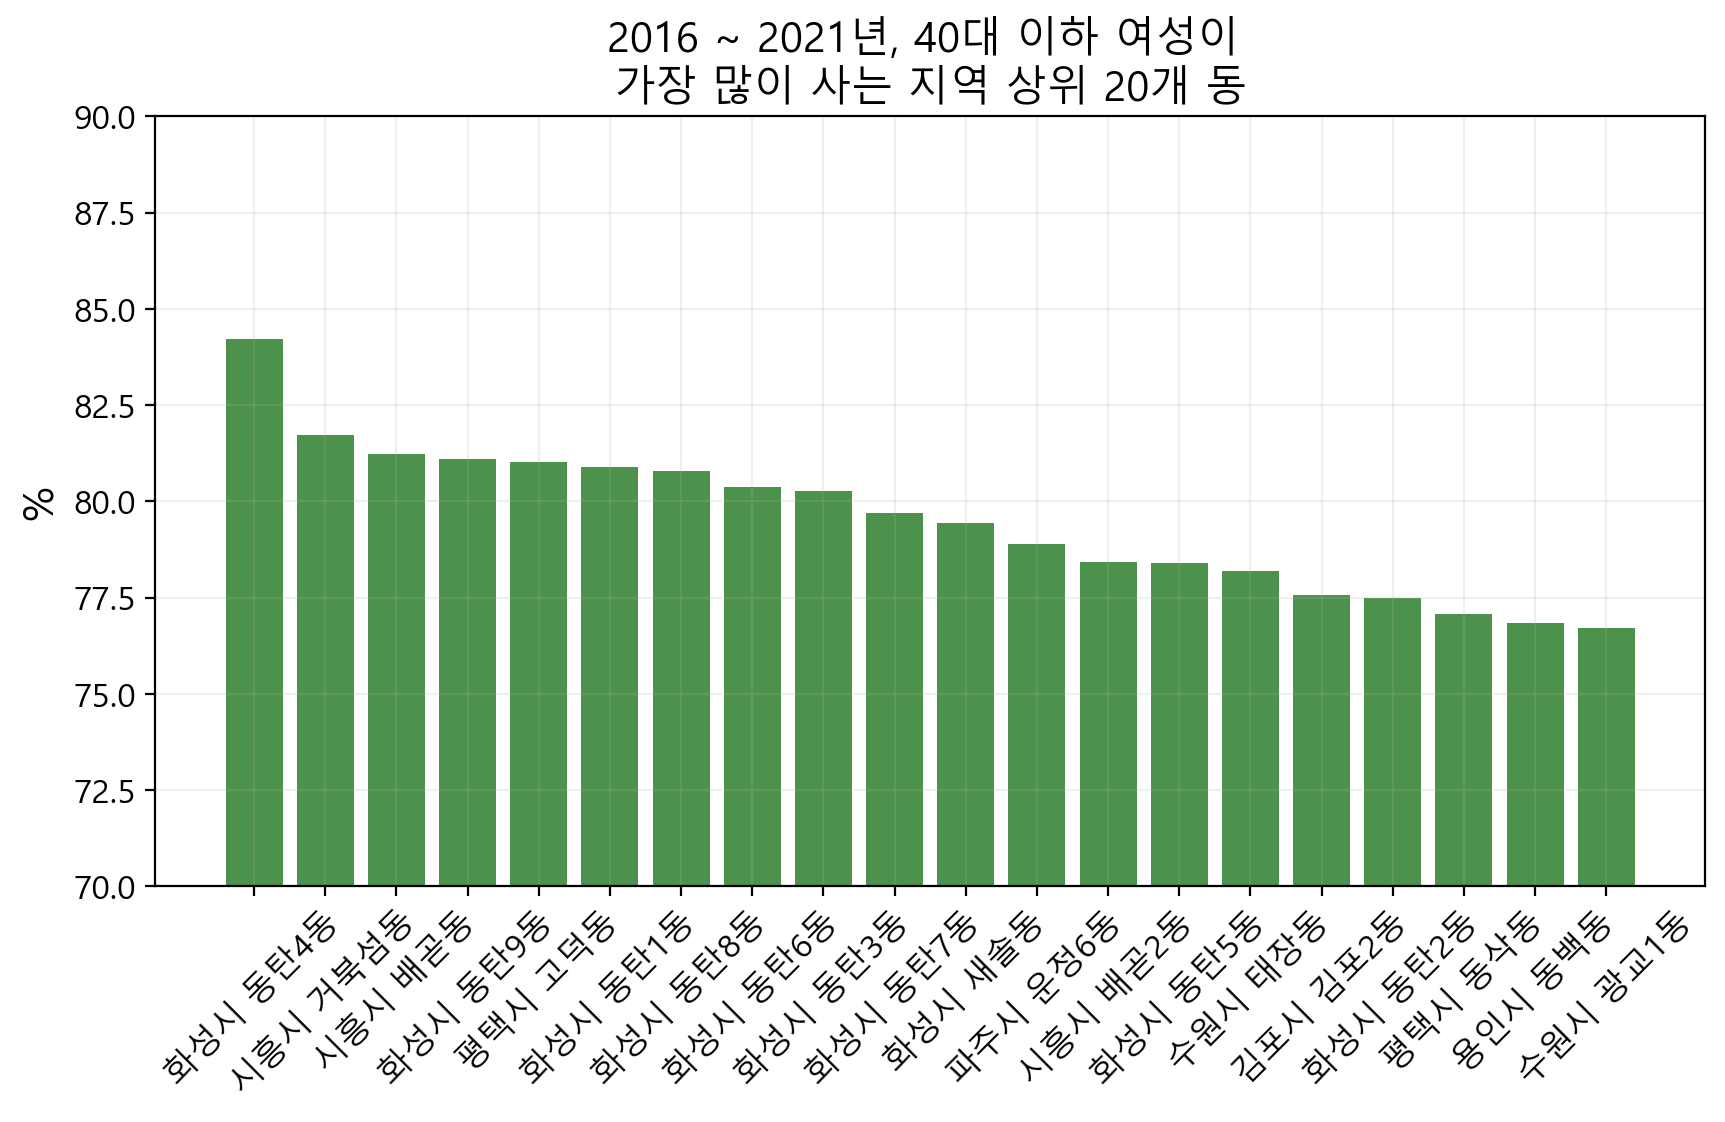

In [25]:
df_top20 = df_resent_group.sort_values(by='40대_이하_여성비율(%)', ascending=False)[:20]
x = df_top20['시-동']
y = df_top20['40대_이하_여성비율(%)']

plt.figure(figsize=(10, 5))
plt.title("2016 ~ 2021년, 40대 이하 여성이 \n가장 많이 사는 지역 상위 20개 동", fontsize=15)
plt.bar(x, y, alpha=0.7, color='darkgreen')

plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
plt.ylabel("%", size=15)
plt.ylim(70, 90)

plt.grid(True, alpha=0.2)

# 국민건강보험공단 진료 내역 정보 전처리
* 직접 함수를 만들고 데이터를 합치거나 병합하는 과정이 핵심


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
import IPython.display
from matplotlib_inline.backend_inline import set_matplotlib_formats
IPython.display.set_matplotlib_formats = set_matplotlib_formats('retina')

doctor_data = pd.read_csv('C:/Users/hisem/Desktop/DataAnalysisPython/1장/data/ph_2023.CSV', encoding='cp949')
doctor_data.head(2)

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,2023,416815,2667446,2,14,26,2023-02-02,3,1,J209,J304,1,1,0.15,12380,1500,10880,4
1,2023,607165,2669619,1,14,28,2023-02-06,3,1,J209,J304,1,1,0.15,12380,1500,10880,5


## 데이터 연결 및 필요한 열만 추출
* 진료과목코드, 주상병코드, 성별코드, 연령대코드를 파악해서 여성들을 나이별로 분류하고 어떤 진료를 자주 받고 어떤 병을 앓고 있는지 파악
* 처방 일수나 보험금 정보는 필요하지 않음

In [30]:
target_cols = ['성별코드', '연령대코드', '진료과목코드', '주상병코드', '부상병코드']

doctor_data_short = doctor_data[target_cols]

print("2023년 진료행위 총 :", doctor_data_short.shape[0], "회")
doctor_data_short.head(2)

2023년 진료행위 총 : 13831382 회


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드
0,2,14,1,J209,J304
1,1,14,1,J209,J304


## 다른 데이터와 데이터 합치기 1
* 진료과목코드에 1로 저장되어 있으면 무슨 진료과목인지 알 수 없음.
* 코드 대신 정의로 대체하는 작업 \
url : https://opendata.hira.or.kr/op/opc/selectColumnCodeList.do?tblId=&pageIndex=8


In [41]:
treat_code = pd.read_excel('C:/Users/hisem/Desktop/DataAnalysisPython/1장/data/컬럼정보_코드.xls')
treat_code = treat_code[treat_code['코드구분']=='진료과목코드']
treat_code.dropna(inplace=True)

treat_code.head(2)

,코드구분,설명,코드,명칭
343,진료과목코드,분석차원_진료과목코드,00,일반의
344,진료과목코드,분석차원_진료과목코드,01,내과


In [42]:
treat_code = treat_code[['코드','명칭']]
treat_code.rename(columns={'코드':'진료과목코드_str', '명칭':'진료과목'}, inplace=True)

treat_code.head(3)


,진료과목코드_str,진료과목
343,00,일반의
344,01,내과
345,02,신경과


In [43]:
# zfill() 함수 실습
code = '1'
print("zfill()에 2로 지정하면", code.zfill(2))
print("zfill()에 3으로 지정하면", code.zfill(3))

zfill()에 2로 지정하면 01
zfill()에 3으로 지정하면 001


In [44]:
treat_code['진료과목코드_str'] = treat_code['진료과목코드_str'].apply(lambda x:str(x).zfill(2))
treat_code.head(3)

,진료과목코드_str,진료과목
343,00,일반의
344,01,내과
345,02,신경과


In [47]:
doctor_data_short['진료과목코드_str'] = doctor_data_short['진료과목코드'].apply(lambda x:str(x).zfill(2))
doctor_data_short.reset_index(drop=True, inplace=True)
doctor_data_short.head(1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13596\2003313206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctor_data_short['진료과목코드_str'] = doctor_data_short['진료과목코드'].apply(lambda x:str(x).zfill(2))


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str
0,2,14,1,J209,J304,01


In [48]:
doctor_data_short = pd.merge(doctor_data_short, treat_code, how='left', on='진료과목코드_str')
doctor_data_short.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목
0,2,14,1,J209,J304,01,내과
1,1,14,1,J209,J304,01,내과


In [49]:
print('2023년 진료과목별 진료횟수 Top20')
doctor_data_short['진료과목'].value_counts()[:20]

2023년 진료과목별 진료횟수 Top20


진료과목
내과          4713931
정형외과        2071979
이비인후과       1710874
안과           848030
소아청소년과       746448
피부과          580593
정신건강의학과      440357
가정의학과        419833
외과           411278
산부인과         383941
비뇨의학과        322891
신경외과         273113
신경과          248800
마취통증의학과      229896
재활의학과        172958
응급의학과        123913
일반의           38406
심장혈관흉부외과      32640
성형외과          21087
영상의학과         18436
Name: count, dtype: int64

<BarContainer object of 35 artists>

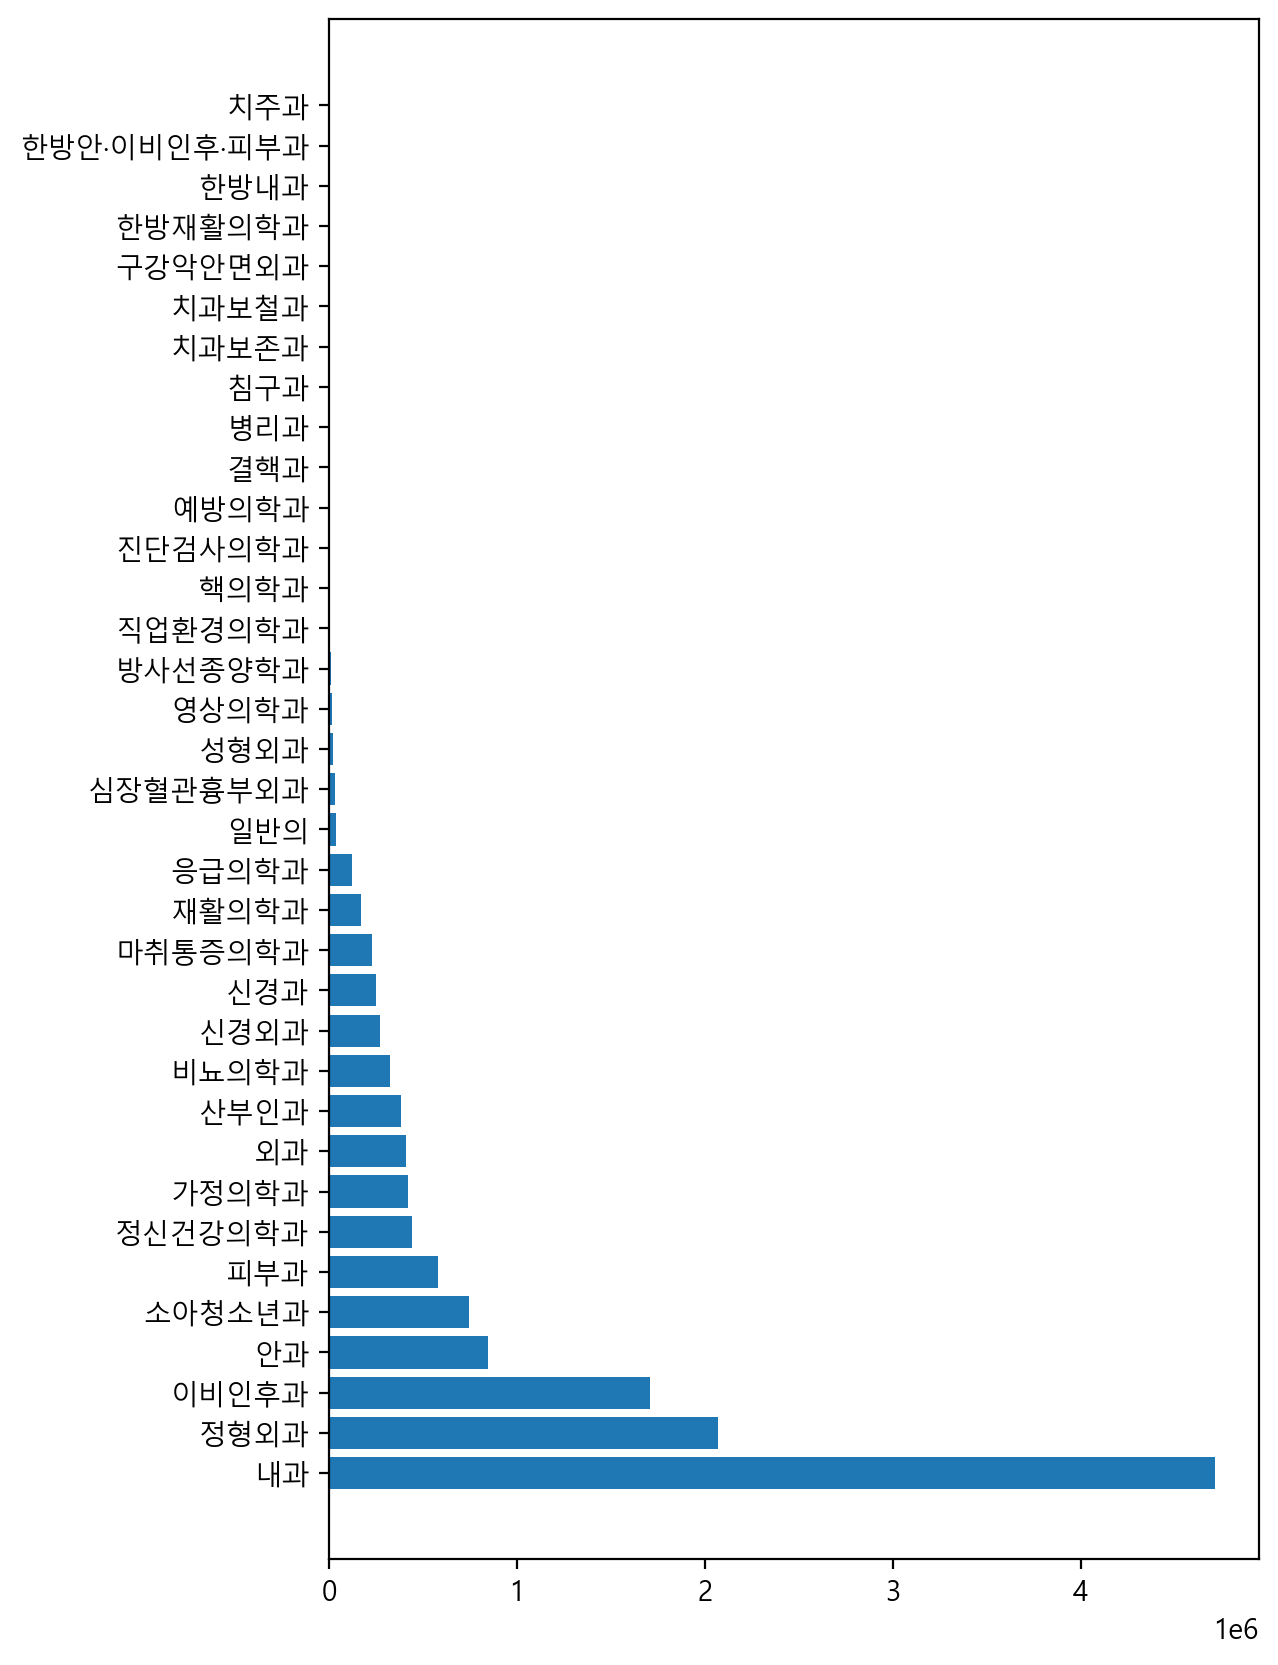

In [52]:
x_hospitals = list(doctor_data_short['진료과목'].value_counts().index)
y_hos_values = doctor_data_short['진료과목'].value_counts().values
plt.figure(figsize=(6,10))
plt.barh(x_hospitals, y_hos_values)

## 다른 데이터와 데이터 합치기 2
* 상병코드 의미

In [53]:
#데이터가 저장된 경로로 입력
disease_code = pd.read_csv('C:/Users/hisem/Desktop/DataAnalysisPython/1장/data/건강보험심사평가원_상병마스터_20240131.csv', encoding='cp949')
disease_code.head(2)

,상병기호,한글명,영문명,완전코드구분,주상병사용구분,법정감염병구분,성별구분,상한연령,하한연령,양한방구분
0,A00,콜레라,Cholera,N,NaN,제2급,NaN,NaN,NaN,양·한방 공통
1,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라,"Cholera due to Vibrio cholerae 01, biovar chol...",NaN,NaN,제2급,NaN,NaN,NaN,양·한방 공통


In [54]:
disease_code = disease_code.iloc[:, :2]
disease_code.rename(columns={"상병기호":"주상병코드"}, inplace=True)
disease_code.head(2)

,주상병코드,한글명
0,A00,콜레라
1,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라


In [55]:
doctor_data_short = pd.merge(doctor_data_short, disease_code, on='주상병코드', how='left')
doctor_data_short.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목,한글명
0,2,14,1,J209,J304,01,내과,상세불명의 급성 기관지염
1,1,14,1,J209,J304,01,내과,상세불명의 급성 기관지염


## 함수를 사용한 데이터 처리
* 성별코드와 연령대코드
* 성별코드에서 남자는 1 여자는 0
* 연령대코드는 숫자가 1~17 이상으로 증가


In [56]:
def findSex(num):
    """성별코드를 해석하는 함수"""
    if num == 1:
        return '남'
    else:
        return '여'
    
def ageCode(num):
    """연령대 분류하는 함수"""
    if (num==1) or (num==2):
        return "9세미만"
    elif (num==3) or (num==4):
        return "10대"
    elif (num==5) or (num==6):
        return "20대"
    elif (num==7) or (num==8):
        return "30대"
    elif (num==9) or (num==10):
        return "40대"
    elif (num==11) or (num==12):
        return "50대"
    elif (num==13) or (num==14):
        return "60대"
    elif (num==15) or (num==16):
        return "70대"
    elif (num==17) or (num==18):
        return "80대"
    else:
        return "80대이상"

In [57]:
doctor_data_short['성별'] = doctor_data_short['성별코드'].apply(lambda x:findSex(num=x))
doctor_data_short['연령대'] = doctor_data_short['연령대코드'].apply(lambda x:ageCode(num=x))
doctor_data_short.head(3)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목,한글명,성별,연령대
0,2,14,1,J209,J304,01,내과,상세불명의 급성 기관지염,여,60대
1,1,14,1,J209,J304,01,내과,상세불명의 급성 기관지염,남,60대
2,1,14,1,J209,J304,01,내과,상세불명의 급성 기관지염,남,60대


In [59]:
doctor_data_short.to_csv('C:/Users/hisem/Desktop/DataAnalysisPython/1장/data/2023_진료정보.csv', index=False)